<center> <h2> DS 3000 - Summer 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>Crypto Market Behaviors</h3> </center>
<center><h4>David Mberingabo, Manami Kanemura, Mark Shomakhov</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

In this report, we use filled order-book trades to compute new features, targets and a predictive model for predicting mid-price movements in real cryptocurrency markets. We describe our feature extraction methods such as One-Hot Encoding. We used GridSearch to tune our cetegorization model for the best scaler, selector and classifier. We present and discuss our best model's results such as predictive accuracy on both training and testing data sets for each regression and categorization analysis function we use.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS - Classification</a>
4. <a href='#3'>RESULTS - Regression</a>
5. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

### &emsp; 1.1. Problem Statement

For our Regression Problem, we use a filled orders dataset from the Genimi exchange and analyze the relationship of volume and mean amount of transaction over a period of time. For our Classification Problem, we use unsupervised learning machine algorithms such as clustering to create features and visualizations, and we use those features and others in classification models for predicting our target variable (mid-price movement over 4 hours). We believe classification of price movements to be the most effective use of ML with this kind of data, and so for the sake of time we only tuned our classification models.
  

### &emsp; 1.2. Significance of Problem
For many years people have tried to understand the world and create a model which can explain everything. But for now it is impossible. And the center part of this problem is relationships between objects and forces which affect others. And financial markets (here cryptocurrency markets since their availability and ease of use) are the great opportunity for us as students to start to study this field. We can try, at least with some level of confidence and probability, to understand the market and users behavior and use it in future. To use this path we made in other fields. Or if we do this well enough we can at least earn some money if we use this research to make a trading model.

**Synthesize previous research**

We consulted "Machine Learning for Forecasting Mid Price Movement using Limit Order Book Data" by Paraskevi Nousi and co (https://arxiv.org/pdf/1809.07861.pdf). They found that "Machine Learning techniques are capable of correctly predicting mid price movements". We used their advise on using mid-price movements, spread and depth.

### &emsp; 1.3. Questions and Hypotheses

1. The volume, which represents the total amount of transactions, will increase every two weeks because people  receive their salary.
2. Which features are most correlated with each other?
3. Trade volumes and prices affect market behavior such as: 
    - During periods where price is INCREASING (more than in general) mostly BUY orders are going to be filled. 
    - During periods where price is DECREASING (more than in general) mostly SELL orders are going to be filled.
    - During periods where price is INCREASING (more than in general) mostly SELL orders are going to be filled. 
    - During periods where price is DECREASING (more than in general) mostly BUY orders are going to be filled.
4. Which classification models best predict 4 hour mid-price movement?
5. Hypotheses: Our best classification model will be 60% accurate or more. 
    - H0: Our best classification model is less than 60% accurate.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

Our dataset was obtained from https://www.cryptodatadownload.com/cdd/tradeprints/Gemini_BTCUSD_tradeprints_Q4_2019.csv.

This website contains a lot of different data about all cryptocurrencies for free and is well trusted. We added this dataset to our repository in GitHub (https://github.com/drakstik/ds3000/tree/master/FinalProject).

The dataset has all the actual trades that occured on Gemini since September 2019. It has approximately 700,000 samples (trades).


In [21]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/drakstik/DS3000FinalRes/master/Gemini_BTCUSD_tradeprints_Q4_2019.csv', na_values = ['nan']).iloc[::-1].reset_index(drop=True).drop('trans_id', axis=1)
data.head(10)

,unix,TradeDate,symbol,price,amount,type
0,1567296063967,2019-09-01 00:01:03,BTCUSD,9598.28,0.005686,buy
1,1567296147040,2019-09-01 00:02:27,BTCUSD,9602.25,0.018967,buy
2,1567296304372,2019-09-01 00:05:04,BTCUSD,9616.12,0.020000,buy
3,1567296350580,2019-09-01 00:05:50,BTCUSD,9619.22,0.687976,buy
4,1567296382476,2019-09-01 00:06:22,BTCUSD,9615.58,0.008051,buy
5,1567296385273,2019-09-01 00:06:25,BTCUSD,9615.07,0.003031,buy
6,1567296391867,2019-09-01 00:06:31,BTCUSD,9615.07,0.001040,buy
7,1567296541443,2019-09-01 00:09:01,BTCUSD,9612.52,0.015217,buy
8,1567296567990,2019-09-01 00:09:27,BTCUSD,9610.79,0.010044,buy
9,1567296611921,2019-09-01 00:10:11,BTCUSD,9610.95,0.050994,buy


In [22]:
data.shape

(765528, 6)

### 2.2. Variables
We identified price movements (up or down) as our target/outcome variable for unsupervised predictive models. We chose the period as our Independent Variable, while features such as mean_amount, future price movement and total order type as Dependent Variables for our hypotheses and questions.


### 2.3. Data Analysis
We have two models, a regression model and a classification model. The regression model is used to predict the mean_amount and the classification model is used to predict the mip-price movement. For the regression model we start with these features ['volume', 'min_sell', 'max_buy', 'spread'] and finally select max_buy and spread. For classification we run a gridSearch() function running a scalor, selector and classifier, and the combination of parameters, and we present which combination of parameters works best. Features for the classification model are ['TradeDate', 'mid_price', 'mean_price', 'volume', 'p_v_avg', 'p_v_std', 'buy_volume_1%', 'sell_volume_1%', 'buy_volume_3%', 'sell_volume_3%', 'buy_volume_5%', 'sell_volume_5%', 'buy_volume_10%', 'sell_volume_10%', 'spread', 'std_price', 'price_log_avg', 'price_log_std', 'type_auction', 'type_block', 'type_buy', 'type_sell', average and standard deviation of price derivatives for the past 1000, 500, 200, 100, 50, 20, 10, 5 and 1 ticks].

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS - Classification

### 3.1. Data Wrangling
Our dataset requires One Hot Encoding for some variables in order for us to do regression analysis. The dataset also requires more features to be created. We need a function that creates features given a period-frequency (30 min, 60 min, etc...) after applying One Hot Encoding.

*Description of Unprocessed Features*

"\[feature_name\]": \[description\]
- “unix”: UNIX timestamp corresponding to date in each row
- “TradeDate”: Date on which each trade was made
- "symbol": type of cryptocurrency and real money. This dataset is Bitcoin and us dollar. 
- "amount": Amount of btc sold or bought
- "type": if the trade was for buying or selling

In [4]:
data.TradeDate = pd.to_datetime(data.TradeDate)
data = data.rename(columns={'type': 'typee'})

# One Hot Encoding the variable 'type'
data = pd.concat([data, pd.get_dummies(data['typee'], prefix='type')], axis=1)
data.drop(['typee'], axis=1, inplace=True)
data.head()

,unix,TradeDate,symbol,price,amount,type_auction,type_block,type_buy,type_sell
0,1567296063967,2019-09-01 00:01:03,BTCUSD,9598.28,0.005686,0,0,1,0
1,1567296147040,2019-09-01 00:02:27,BTCUSD,9602.25,0.018967,0,0,1,0
2,1567296304372,2019-09-01 00:05:04,BTCUSD,9616.12,0.020000,0,0,1,0
3,1567296350580,2019-09-01 00:05:50,BTCUSD,9619.22,0.687976,0,0,1,0
4,1567296382476,2019-09-01 00:06:22,BTCUSD,9615.58,0.008051,0,0,1,0


In [5]:
import numpy as np

def cleaning(df):
    # Delete NaN values
    df.dropna(inplace=True)
    return df.reset_index(drop=True)

def create_simple_features(df):
    # Log of price
    df['price_log'] = df.price.apply(np.log)
    # Price * Volume
    df['p_v'] = (df.price * df.amount).apply(np.log)
    # Price difference(in perc)
    df['p_diff_1'] = df.price.pct_change(1) 
    # Price difference(in perc) 5 ticks
    df['p_diff_5'] = df.price.pct_change(5) 
    # Price difference(in perc) 10 ticks
    df['p_diff_10'] = df.price.pct_change(10) 
    # Price difference(in perc) 20 ticks
    df['p_diff_20'] = df.price.pct_change(20) 
    # Price difference(in perc) 50 ticks
    df['p_diff_50'] = df.price.pct_change(50) 
    # Price difference(in perc) 100 ticks
    df['p_diff_100'] = df.price.pct_change(100) 
    # Price difference(in perc) 200 ticks
    df['p_diff_200'] = df.price.pct_change(200) 
    # Price difference(in perc) 500 ticks
    df['p_diff_500'] = df.price.pct_change(500)
    # Price difference(in perc) 1000 ticks
    df['p_diff_1000'] = df.price.pct_change(1000)
    # Volume difference(in perc) 1 tick
    df['v_diff_1'] = df.amount.pct_change(1) 
    # Volume difference(in perc) 5 tick
    df['v_diff_5'] = df.amount.pct_change(5) 
    # Moving Average of Price
    df['p_sma_5'] = df.price.rolling(5).mean()
    # Moving Average of Price
    df['p_sma_10'] = df.price.rolling(10).mean()
    # Moving Average of Price
    df['p_sma_50'] = df.price.rolling(50).mean()
    # Moving Average of Price
    df['p_sma_100'] = df.price.rolling(100).mean()
    # Moving Average of Price
    df['p_sma_500'] = df.price.rolling(500).mean()
    # Derivatives of price difference
    df['p_diff2_5'] = df.p_diff_5.pct_change(5) 
    df['p_diff2_10'] = df.p_diff_10.pct_change(10) 
    df['p_diff2_20'] = df.p_diff_20.pct_change(20) 
    df['p_diff2_50'] = df.p_diff_50.pct_change(50) 
    df['p_diff2_100'] = df.p_diff_100.pct_change(100) 
    df['p_diff2_200'] = df.p_diff_200.pct_change(200) 
    df['p_diff2_500'] = df.p_diff_500.pct_change(500)
    df['p_diff2_1000'] = df.p_diff_1000.pct_change(1000)
    # Time difference 1 tick
    df['t_diff_1'] = df.price.diff(1)
    # Time difference 10 tick
    df['t_diff_10'] = df.price.diff(10)
    # Time difference 50 tick
    df['t_diff_50'] = df.price.diff(50)
    # Time difference 100 tick
    df['t_diff_100'] = df.price.diff(100)
    
    return df

In [6]:
data1 = cleaning(data)
data2 = create_simple_features(data1)
data3 = cleaning(data2)
data3.head()

,unix,TradeDate,symbol,price,amount,type_auction,type_block,type_buy,type_sell,price_log,...,p_diff2_20,p_diff2_50,p_diff2_100,p_diff2_200,p_diff2_500,p_diff2_1000,t_diff_1,t_diff_10,t_diff_50,t_diff_100
0,1567376460054,2019-09-01 22:21:00,BTCUSD,9742.55,0.001574,0,0,1,0,9.184258,...,-1.379088,-2.648075,-2.177963,-0.979193,13.685458,-17.868654,7.86,7.86,42.26,16.55
1,1567376492413,2019-09-01 22:21:32,BTCUSD,9742.55,0.402743,0,0,1,0,9.184258,...,-1.251039,-2.648075,-2.338535,-0.964499,7.824446,-7.580248,0.00,7.86,42.26,16.55
2,1567376492413,2019-09-01 22:21:32,BTCUSD,9742.55,0.166569,0,0,1,0,9.184258,...,-1.563851,-4.053339,-2.393628,-0.960157,6.424665,-6.784693,0.00,7.86,24.62,16.55
3,1567376574281,2019-09-01 22:22:54,BTCUSD,9744.07,0.269450,0,0,0,1,9.184414,...,-1.614035,-4.247408,-2.573162,-0.943634,7.162643,-7.806153,1.52,9.38,26.12,18.07
4,1567376588840,2019-09-01 22:23:08,BTCUSD,9751.24,0.020112,0,0,0,1,9.185150,...,-2.081260,-6.334101,-3.583851,-0.869413,6.532871,-8.291571,7.17,16.55,30.28,24.60


In [7]:
def get_mid_pct(pct, mid_price):
    return mid_price+(pct*mid_price), mid_price-(pct*mid_price)

# 15T executed in 1m 47.0s, 13165 rows
# 30T executed in 53.2s, 6582 rows
# p can be one of: (15 min = '15T', 45 min = '45T', daily='D', weekly='W', monthly='M')
def periodize(data, p):
    # Build a list of date-ranges to iterate over, with the given frquency p (15 min = '15T', 45 min = '45T', daily='D', weekly='W', monthly='M')
    start_date = data['TradeDate'].iloc[0]
    end_date = data['TradeDate'].iloc[-1]
    period_dates = pd.date_range(start=start_date, end=end_date, freq=p)
    df_datetime = pd.to_datetime(data['TradeDate'])
    df_datetime_index = pd.DatetimeIndex(df_datetime.values)
    data = data.set_index(df_datetime_index).drop('TradeDate', axis=1)
    ret = pd.DataFrame([])
    for x in range(len(period_dates) - 1):
        start_p = period_dates[x]
        end_p = period_dates[x+1]
        period = data[start_p:end_p]
        
        # Calculating minimum and maximum bid and ask order fills prices during period
        max_sell = period[period['type_sell'] == 1]['price'].max()
        min_sell = period[period['type_sell'] == 1]['price'].min()
        max_buy = period[period['type_buy'] == 1]['price'].max()
        min_buy = period[period['type_buy'] == 1]['price'].min()
        
        # Calculating 'mid-price', 'mean-price', standard deviation of price during period
        mid_price = (max_sell + max_buy)/2
        mean_price = period['price'].mean()
        std_price = period['price'].std()
        
        # Calculating 'volume' during period
        volume = period['amount'].sum()
        
        # Calculating 'spread'
        spread = max_sell - min_buy
        
        # Calculating 'depth' or 'bid volume 1%' & 'ask volume 1%'
        one_pct_mid_range = get_mid_pct(0.01, mid_price)
        three_pct_mid_range = get_mid_pct(0.03, mid_price)
        five_pct_mid_range = get_mid_pct(0.05, mid_price)
        ten_pct_mid_range = get_mid_pct(0.1, mid_price)
        mask1 = period['price'] < one_pct_mid_range[0]
        mask2 = period['price'] > one_pct_mid_range[1]
        mask3 = period['type_buy'] == 1
        mask4 = period['type_sell'] == 1
        mask5 = period['price'] < five_pct_mid_range[0]
        mask6 = period['price'] > five_pct_mid_range[1]
        mask7 = period['price'] < ten_pct_mid_range[0]
        mask8 = period['price'] > ten_pct_mid_range[1]
        mask9 = period['price'] < three_pct_mid_range[0]
        mask10 = period['price'] > three_pct_mid_range[1]

        buy_volume_1 = period[mask1 & mask2 & mask3]['amount'].sum()
        sell_volume_1 = period[mask1 & mask2 & mask4]['amount'].sum()
        buy_volume_5 = period[mask5 & mask6 & mask3]['amount'].sum()
        sell_volume_5 = period[mask5 & mask6 & mask4]['amount'].sum()
        buy_volume_10 = period[mask7 & mask8 & mask3]['amount'].sum()
        sell_volume_10 = period[mask7 & mask8 & mask4]['amount'].sum()
        buy_volume_3 = period[mask9 & mask10 & mask3]['amount'].sum()
        sell_volume_3 = period[mask9 & mask10 & mask4]['amount'].sum()
        
        # Calculating 'type' count during period
        type_auction = period['type_auction'].sum()
        type_block = period['type_block'].sum()
        type_buy = period['type_buy'].sum()
        type_sell = period['type_sell'].sum()
        
        # The rest of the features should just be averaged and standard deviation
        price_log_avg = period['price_log'].mean()
        price_log_std = period['price_log'].std()
        
        p_v_avg = period['p_v'].mean()
        p_v_std = period['p_v'].std()
        
        p_diff_1_avg = period['p_diff_1'].mean()
        p_diff_1_std = period['p_diff_1'].std()
        p_diff_5_avg = period['p_diff_5'].mean()
        p_diff_5_std = period['p_diff_5'].std()
        p_diff_10_avg = period['p_diff_10'].mean()
        p_diff_10_std = period['p_diff_10'].std()
        p_diff_20_avg = period['p_diff_20'].mean()
        p_diff_20_std = period['p_diff_20'].std()
        p_diff_50_avg = period['p_diff_50'].mean()
        p_diff_50_std = period['p_diff_50'].std()
        p_diff_100_avg = period['p_diff_100'].mean()
        p_diff_100_std = period['p_diff_100'].std()
        p_diff_200_avg = period['p_diff_200'].mean()
        p_diff_200_std = period['p_diff_200'].std()
        p_diff_500_avg = period['p_diff_500'].mean()
        p_diff_500_std = period['p_diff_500'].std()
        p_diff_1000_avg = period['p_diff_1000'].mean()
        p_diff_1000_std = period['p_diff_1000'].std()
        
        v_diff_1_avg = period['v_diff_1'].mean()
        v_diff_1_std = period['v_diff_1'].std()
        v_diff_5_avg = period['v_diff_5'].mean()
        v_diff_5_std = period['v_diff_5'].std()
        
        p_diff2_5_avg = period['p_diff2_5'].mean()
        p_diff2_5_std = period['p_diff2_5'].std()
        p_diff2_10_avg = period['p_diff2_10'].mean()
        p_diff2_10_std = period['p_diff2_10'].std()
        p_diff2_20_avg = period['p_diff2_20'].mean()
        p_diff2_20_std = period['p_diff2_20'].std()
        p_diff2_50_avg = period['p_diff2_50'].mean()
        p_diff2_50_std = period['p_diff2_50'].std()
        p_diff2_100_avg = period['p_diff2_100'].mean()
        p_diff2_100_std = period['p_diff2_100'].std()
        p_diff2_200_avg = period['p_diff2_200'].mean()
        p_diff2_200_std = period['p_diff2_200'].std()
        p_diff2_500_avg = period['p_diff2_500'].mean()
        p_diff2_500_std = period['p_diff2_500'].std()
        p_diff2_1000_avg = period['p_diff2_1000'].mean()
        p_diff2_1000_std = period['p_diff2_1000'].std()
        
        row = {'TradeDate':end_p, 'spread':spread, 'mid_price':mid_price, 'mean_price':mean_price, 'std_price':std_price, 'volume':volume, 
                'type_auction':type_auction, 'type_block':type_block, 'type_buy':type_buy, 'type_sell':type_sell,
                'volume':volume,
                'buy_volume_1%':buy_volume_1, 'sell_volume_1%':sell_volume_1,
                'buy_volume_3%':buy_volume_3, 'sell_volume_3%':sell_volume_3,
                'buy_volume_5%':buy_volume_5, 'sell_volume_5%':sell_volume_5,
                'buy_volume_10%':buy_volume_10, 'sell_volume_10%':sell_volume_10,
                'price_log_avg':price_log_avg, 'price_log_std':price_log_std, 
                'p_v_avg':p_v_avg, 'p_v_std':p_v_std,
                'p_diff_1_avg':p_diff_1_avg, 'p_diff_1_std':p_diff_1_std,
                'p_diff_5_avg':p_diff_5_avg, 'p_diff_5_std':p_diff_5_std,
                'p_diff_10_avg':p_diff_10_avg, 'p_diff_10_std':p_diff_10_std,
                'p_diff_20_avg':p_diff_20_avg, 'p_diff_20_std':p_diff_20_std,
                'p_diff_50_avg':p_diff_50_avg, 'p_diff_50_std':p_diff_50_std,
                'p_diff_100_avg':p_diff_100_avg, 'p_diff_100_std':p_diff_100_std,
                'p_diff_200_avg':p_diff_200_avg, 'p_diff_200_std':p_diff_200_std,
                'p_diff_500_avg':p_diff_500_avg, 'p_diff_500_std':p_diff_500_std,
                'p_diff_1000_avg':p_diff_1000_avg, 'p_diff_1000_std':p_diff_1000_std,}
        ret = ret.append(row, ignore_index=True)
        
    ret = ret.reindex(columns=['TradeDate', 'mid_price', 'mean_price', 'volume', 'p_v_avg', 'p_v_std',
               'buy_volume_1%', 'sell_volume_1%', 'buy_volume_3%', 'sell_volume_3%', 'buy_volume_5%', 'sell_volume_5%', 'buy_volume_10%', 'sell_volume_10%', 
               'spread', 'std_price', 'price_log_avg', 'price_log_std',
               'type_auction', 'type_block', 'type_buy', 'type_sell', 
               'p_diff_1000_avg', 'p_diff_1000_std', 'p_diff_500_avg', 'p_diff_500_std', 
               'p_diff_200_avg', 'p_diff_200_std', 'p_diff_100_avg', 'p_diff_100_std', 
               'p_diff_50_avg', 'p_diff_50_std', 'p_diff_10_avg', 'p_diff_10_std', 
               'p_diff_20_avg', 'p_diff_20_std', 'p_diff_5_avg', 'p_diff_5_std', 'p_diff_1_avg', 'p_diff_1_std'])
    return ret
data4 = periodize(data3, 'H')
data4

,TradeDate,mid_price,mean_price,volume,p_v_avg,p_v_std,buy_volume_1%,sell_volume_1%,buy_volume_3%,sell_volume_3%,...,p_diff_50_avg,p_diff_50_std,p_diff_10_avg,p_diff_10_std,p_diff_20_avg,p_diff_20_std,p_diff_5_avg,p_diff_5_std,p_diff_1_avg,p_diff_1_std
0,2019-09-01 23:21:00,9838.750,9797.149087,64.387832,4.661716,3.339237,54.972398,9.415434,54.972398,9.415434,...,0.001161,0.003356,0.000185,0.001580,0.000436,0.002143,0.000092,0.001190,1.815917e-05,0.000590
1,2019-09-02 00:21:00,9784.995,9772.549541,22.053730,5.014523,2.725616,14.722651,7.331078,14.722651,7.331078,...,-0.000377,0.002458,0.000004,0.000916,0.000042,0.001250,-0.000027,0.000682,-6.496234e-06,0.000347
2,2019-09-02 01:21:00,9783.645,9777.430000,4.990814,4.326182,2.030516,2.890299,2.100515,2.890299,2.100515,...,0.000058,0.001122,0.000026,0.000654,0.000018,0.000972,0.000036,0.000447,1.680126e-05,0.000232
3,2019-09-02 02:21:00,9775.240,9768.102234,6.599274,4.784383,1.936833,4.704690,1.894584,4.704690,1.894584,...,-0.000748,0.000752,-0.000074,0.000389,-0.000245,0.000527,-0.000024,0.000326,-4.405111e-08,0.000255
4,2019-09-02 03:21:00,9799.130,9787.730794,20.930695,4.589762,2.491224,17.961180,2.969515,17.961180,2.969515,...,0.001104,0.000753,0.000242,0.000660,0.000476,0.000732,0.000118,0.000567,2.036634e-05,0.000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,2020-01-16 21:21:00,8742.765,8702.951379,17.217384,2.150083,4.023364,9.114629,8.102755,9.114629,8.102755,...,-0.000433,0.003308,-0.000110,0.001303,-0.000172,0.002003,-0.000059,0.000875,-1.331313e-05,0.000543
3287,2020-01-16 22:21:00,8699.905,8684.336050,24.679749,2.217393,4.211443,8.459243,6.220506,8.459243,6.220506,...,0.000627,0.001358,0.000172,0.001140,0.000293,0.001226,0.000088,0.001017,1.711736e-05,0.000916
3288,2020-01-16 23:21:00,8735.060,8712.217819,28.384524,2.051866,4.404723,19.757692,8.626833,19.757692,8.626833,...,0.000766,0.001218,0.000177,0.000935,0.000335,0.001004,0.000087,0.000805,1.721735e-05,0.000700
3289,2020-01-17 00:21:00,8730.995,8716.275522,17.850358,2.633727,4.144004,12.423004,5.427354,12.423004,5.427354,...,-0.000474,0.001413,-0.000211,0.000776,-0.000367,0.000992,-0.000103,0.000597,-1.973368e-05,0.000472


In [8]:
data4.to_csv(r'data4.csv')
data5 = data4.dropna().copy()

### 3.2. Data Exploration
For the classification model, we extract regime features that represent different component ranges in the GaussianMixture model. Using a scatter plot we visualize clusters using 4 components. We were unable to see a pattern from this visualization.


In [9]:
from sklearn import mixture as mix
import seaborn as sns
import matplotlib.pyplot as plt

def regimes(data, comps):
    df = data.drop(columns = ['TradeDate','mid_price','mean_price']).copy()
    df = cleaning(df)
    unsup = mix.GaussianMixture(n_components=comps, 
                                covariance_type="spherical", 
                                n_init=100)

    unsup.fit(np.reshape(df, (-1, df.shape[1])))
    regime = unsup.predict(np.reshape(df, (-1, df.shape[1])))

    Regimes = pd.DataFrame(regime,columns=['Regime'],index=df.index)
    return Regimes

def create_regimes(df):
    ddf = df.copy()
    for i in range(2,7):
        ddf['regime_'+str(i)] = regimes(ddf, comps = i)['Regime']
        #OnehotEncoding
        ddf = pd.concat([ddf, pd.get_dummies(ddf['regime_'+str(i)], prefix='regime_'+str(i))], axis=1)
        ddf.drop(['regime_'+str(i)], axis=1, inplace=True)
    return ddf

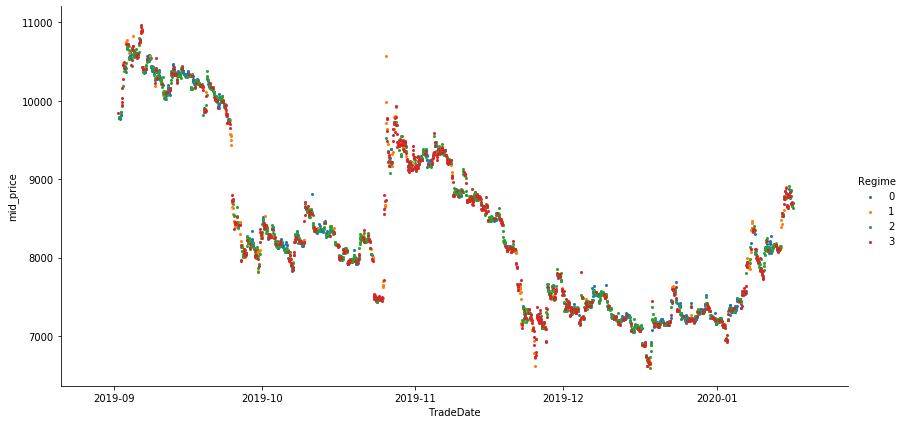

In [10]:
data_reg_show = data4.copy()
data_reg_show['Regime'] = regimes(data_reg_show, comps = 4)['Regime']
order=[0,1,2,3]
fig = sns.FacetGrid(data=data_reg_show,hue='Regime',hue_order=order,aspect=2,height= 6)
fig.map(plt.scatter,'TradeDate','mid_price', s=4).add_legend()
plt.show()

##### Fig.1 Interpretation

This the visualization of one of the clusters created with all the data we have. In this segment, we conducted clustering on four classes and plotted them with different colors to distinguish among classes. As you can see on the plot, these four classes almost show us up and down movements and some classes which we can't explain for now. We will use different clusters as features for feature model creation

In [11]:
data_reg_show.head()

,TradeDate,mid_price,mean_price,volume,p_v_avg,p_v_std,buy_volume_1%,sell_volume_1%,buy_volume_3%,sell_volume_3%,...,p_diff_50_std,p_diff_10_avg,p_diff_10_std,p_diff_20_avg,p_diff_20_std,p_diff_5_avg,p_diff_5_std,p_diff_1_avg,p_diff_1_std,Regime
0,2019-09-01 23:21:00,9838.750,9797.149087,64.387832,4.661716,3.339237,54.972398,9.415434,54.972398,9.415434,...,0.003356,0.000185,0.001580,0.000436,0.002143,0.000092,0.001190,1.815917e-05,0.000590,3.0
1,2019-09-02 00:21:00,9784.995,9772.549541,22.053730,5.014523,2.725616,14.722651,7.331078,14.722651,7.331078,...,0.002458,0.000004,0.000916,0.000042,0.001250,-0.000027,0.000682,-6.496234e-06,0.000347,0.0
2,2019-09-02 01:21:00,9783.645,9777.430000,4.990814,4.326182,2.030516,2.890299,2.100515,2.890299,2.100515,...,0.001122,0.000026,0.000654,0.000018,0.000972,0.000036,0.000447,1.680126e-05,0.000232,0.0
3,2019-09-02 02:21:00,9775.240,9768.102234,6.599274,4.784383,1.936833,4.704690,1.894584,4.704690,1.894584,...,0.000752,-0.000074,0.000389,-0.000245,0.000527,-0.000024,0.000326,-4.405111e-08,0.000255,0.0
4,2019-09-02 03:21:00,9799.130,9787.730794,20.930695,4.589762,2.491224,17.961180,2.969515,17.961180,2.969515,...,0.000753,0.000242,0.000660,0.000476,0.000732,0.000118,0.000567,2.036634e-05,0.000302,2.0


In [12]:
# Creating the regime features
data5 = create_regimes(data4)
data6 = data5.copy()
data6.head()

,TradeDate,mid_price,mean_price,volume,p_v_avg,p_v_std,buy_volume_1%,sell_volume_1%,buy_volume_3%,sell_volume_3%,...,regime_5_1.0,regime_5_2.0,regime_5_3.0,regime_5_4.0,regime_6_0.0,regime_6_1.0,regime_6_2.0,regime_6_3.0,regime_6_4.0,regime_6_5.0
0,2019-09-01 23:21:00,9838.750,9797.149087,64.387832,4.661716,3.339237,54.972398,9.415434,54.972398,9.415434,...,0,0,0,1,0,0,1,0,0,0
1,2019-09-02 00:21:00,9784.995,9772.549541,22.053730,5.014523,2.725616,14.722651,7.331078,14.722651,7.331078,...,0,0,0,0,0,0,0,0,1,0
2,2019-09-02 01:21:00,9783.645,9777.430000,4.990814,4.326182,2.030516,2.890299,2.100515,2.890299,2.100515,...,0,0,0,0,1,0,0,0,0,0
3,2019-09-02 02:21:00,9775.240,9768.102234,6.599274,4.784383,1.936833,4.704690,1.894584,4.704690,1.894584,...,0,0,0,0,1,0,0,0,0,0
4,2019-09-02 03:21:00,9799.130,9787.730794,20.930695,4.589762,2.491224,17.961180,2.969515,17.961180,2.969515,...,0,0,1,0,0,0,0,0,1,0


### 3.3. Model Construction
#### Classification model answered these questions and hypotheses:
3. Trade volumes and prices affect market behavior such as: 
    - During periods where price is INCREASING (more than in general) mostly BUY orders are going to be filled. 
    - During periods where price is DECREASING (more than in general) mostly SELL orders are going to be filled.
    - During periods where price is INCREASING (more than in general) mostly SELL orders are going to be filled. 
    - During periods where price is DECREASING (more than in general) mostly BUY orders are going to be filled.

To test these questions, we find the correlations between mid_price, type_buy and type_sell. As you can see below, there is very little correlation between mid_price and type_buy and type_sell. We were unable to give a definitive answer due to low correlation.

In [13]:
correlations = data5[['mid_price','type_buy', 'type_sell']].corr(method ='pearson') 
correlations

,mid_price,type_buy,type_sell
mid_price,1.000000,0.029213,-0.104364
type_buy,0.029213,1.000000,0.770348
type_sell,-0.104364,0.770348,1.000000


4. Which classification models best predict 4 hour mid-price movement?
5. Hypotheses: Our best classification model will be 60% accurate or more. Null Hypotheses: Our best classification model is less than 60% accurate.

To test these two questions, we first split our data into training and testing sets, then check the correlation matrix of all features and drop all of them which have the absolute value of correlation more than 0.85. Then we run classification models on them using GridSearch.

In [14]:
from sklearn.model_selection import train_test_split

def create_target(df):
    #This depends on the time
    # Basically we check here if in next 4 hours price difference is going to be positive or negative
    df['target'] = np.where(df.mid_price.shift(int(-4)) - df.mid_price > 0, 1, 0)
    df = cleaning(df)
    return df

data7 = create_target(data6)
data7

# Splitting the data into test and train sets.
X_train, X_test, y_train, y_test = train_test_split(data7.drop(['target', 'TradeDate'], axis = 1), data7['target'], test_size = 0.20)

# Select features with low correlation and drop all features 
def feature_selection_corr(X_train, X_test):
    corr_m = X_train.corr(method = "spearman").abs()
    sns.set(font_scale = 1.0)
    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr_m, cmap= "binary", square=True, ax = ax)
    f.tight_layout()
    upper = corr_m.where(np.triu(np.ones(corr_m.shape), k = 1).astype(np.bool))
    drop_list = [c for c in upper.columns if any(upper[c] > 0.85)]
    print(X_train.shape)
    X_train = X_train.drop(drop_list, axis = 1)
    X_test = X_test.drop(drop_list, axis = 1)
    corr_m = X_train.corr(method = "spearman").abs()
    sns.set(font_scale = 1.0)
    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr_m, cmap= "binary", square=True, ax = ax)
    f.tight_layout()
    print(X_train.shape)
    return X_train, X_test


(2620, 59)
(2620, 36)


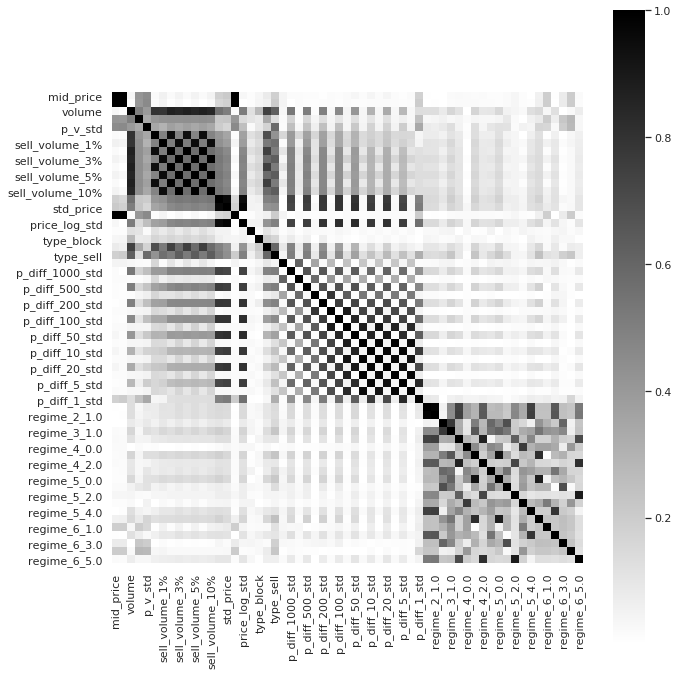

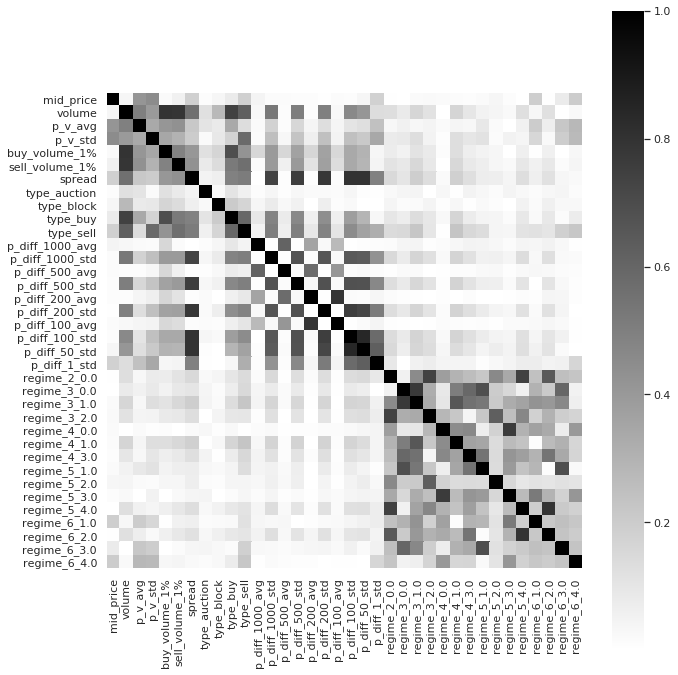

In [15]:
X_train, X_test = feature_selection_corr(X_train, X_test)

##### Interpretation

This is the correlation matrix of all created features in black and white color. We want to drop all columns which have correlation with any other column more than 0.85. As you can see on the second correlation matrix, the colors are less dark among different features. Therefore, the work was completed well here. We have dropped 24 columns.

### 3.4. Model Optimization
We use GridSearchCV to run different models and different parameters for each model. We also use the results to decide which model/parameter combination best suits predicting this type of data.

In [16]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

def gridd():    
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('selector', SelectKBest(mutual_info_classif)),
                     ('classifier', RandomForestClassifier())])

    search_space = [{'scaler': [StandardScaler()]},
                    {'scaler': [MinMaxScaler(feature_range=(0, 1))]},
                    
                    {'selector': [SelectKBest(mutual_info_classif)],
                     'selector__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]},
                    {'selector': [RFE(RandomForestClassifier())],
                     'selector__n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]},

                    {'classifier': [RandomForestClassifier(n_estimators=100, max_features = 'auto')],
                     "classifier__n_estimators": [200],
                     "classifier__class_weight": [None, "balanced"],
                     "classifier__max_features": ["auto", "sqrt", "log2"],
                     "classifier__max_depth" : [3, 4, 5, 6, 7, 8, None],
                     "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                     "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                     "classifier__criterion" :["gini", "entropy"],
                     "classifier__n_jobs": [-1]},

                    {'classifier': [ExtraTreesClassifier()],
                     "classifier__n_estimators": [200],
                     "classifier__class_weight": [None, "balanced"],
                     "classifier__max_features": ["auto", "sqrt", "log2"],
                     "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                     "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                     "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                     "classifier__criterion" :["gini", "entropy"]     ,
                     "classifier__n_jobs": [-1]},

                    {'classifier': [AdaBoostClassifier()],
                     'classifier__n_estimators': [200],
                     "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                     "classifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]},

                    {'classifier': [GradientBoostingClassifier()],
                     "classifier__learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                     "classifier__n_estimators": [200],
                     "classifier__max_depth": [2,3,4,5,6],
                     "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                     "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                     "classifier__max_features": ["auto", "sqrt", "log2"],
                     "classifier__subsample": [0.8, 0.9, 1]}]

    search = GridSearchCV(pipe,
                          search_space,
                          n_jobs=-1,
                          scoring="balanced_accuracy",
                          cv=4,
                          verbose=1)

    search.fit(X_train, y_train)

    par = search.best_estimator_
    sc = search.best_score_
    print(par)
    print(sc)
    return search

### 3.5. Model Testing
* Test your tuned algorithms using your testing set

In [20]:
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# These next two lines take over 90 minutes to run
# search_res = gridd()
# joblib.dump(search_res, 'search_res.pkl')
# loaded_res = joblib.load('search_res.pkl')

# Scaling the train and test data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selecting 10 best features
selector = SelectKBest(k=10, score_func=mutual_info_classif)
selector.fit(X=X_train, y=y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Fitting and scoring the classifier
classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,class_weight=None, criterion='gini', max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0,
                                        min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None, verbose=0, warm_start=False)
classifier.fit(X=X_train_selected, y=y_train)
print('The accuracy score of the model on test set is : ', classifier.score(X_test_selected, y_test))
print('The accuracy score of the model on train set is : ', classifier.score(X_train_selected, y_train))

/home/drakstik/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/drakstik/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SelectKBest from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/drakstik/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/drakstik/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when usi

The accuracy score of the model on test set is :  0.5899390243902439
The accuracy score of the model on train set is :  1.0


### 3.6. Model Evaluation
* We use a balanced accuracy metric and use the GridSearchCV results to find the best_score_ and best_estimator.
* The GridSearchCV function takes over 90 minutes so we ran it earlier and saved the results for easy access.

In [51]:
# print(loaded_res.best_estimator_, loaded_res.best_score_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selector',
                 SelectKBest(k=20,
                             score_func=<function mutual_info_classif at 0x7f4adb9b1e60>)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                              

#### * The best estimator used StandardScaler as a scaler, SelectKBest as a selector and Random Forest Classifier as a classification function, and the best accuracy score was 0.5725.

## 4. RESULTS - Regression

### 4.1 Data Wrangling
In this section, we are going to use regression algorithm on our dataset. To make this dataset more concise at a certain amount of period, the dataset was cleaned up, and new features were created to a new dataframe.

In [23]:
## Import necessary libraries 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [27]:
import plotly.express as px
import datetime as dt
import matplotlib.pyplot as plt

df_market = pd.read_csv('https://raw.githubusercontent.com/drakstik/DS3000FinalRes/master/Gemini_BTCUSD_tradeprints_Q4_2019.csv')
df_market.head()

,unix,TradeDate,symbol,price,amount,type,trans_id
0,1579225081686,2020-01-17 01:38:01,BTCUSD,8693.36,0.000010,sell,9406659516
1,1579225080644,2020-01-17 01:38:00,BTCUSD,8698.94,0.002117,buy,9406659495
2,1579224957646,2020-01-17 01:35:57,BTCUSD,8690.22,0.000010,sell,9406650272
3,1579224956325,2020-01-17 01:35:56,BTCUSD,8699.48,0.028177,buy,9406650194
4,1579224953641,2020-01-17 01:35:53,BTCUSD,8690.22,0.000010,sell,9406649894


In [28]:
## Check the size of the data
df_market.shape

(765528, 7)

In [29]:
## discard unnecessary columns and set tradedate as index

df_market = df_market.drop(["unix", "symbol", "trans_id"], axis=1)
df_market["TradeDate"] = pd.to_datetime(df_market["TradeDate"])
df_market.set_index(pd.DatetimeIndex(df_market["TradeDate"]), inplace=True)
df_market.drop(['TradeDate'], axis=1, inplace=True)
df_market.head()

,price,amount,type
TradeDate,,,
2020-01-17 01:38:01,8693.36,0.000010,sell
2020-01-17 01:38:00,8698.94,0.002117,buy
2020-01-17 01:35:57,8690.22,0.000010,sell
2020-01-17 01:35:56,8699.48,0.028177,buy
2020-01-17 01:35:53,8690.22,0.000010,sell


In [30]:
## Reverse the chronological order of dataset

df_market.sort_index(ascending=True, inplace=True)
df_market.head()

,price,amount,type
TradeDate,,,
2019-09-01 00:01:03,9598.28,0.005686,buy
2019-09-01 00:02:27,9602.25,0.018967,buy
2019-09-01 00:05:04,9616.12,0.020000,buy
2019-09-01 00:05:50,9619.22,0.687976,buy
2019-09-01 00:06:22,9615.58,0.008051,buy


#### Create new features from existing features

1. volume: the total amount of transaction over a period of time
2. spread: maximum bid - minimim ask
3. mean amount: mean amount of transaction over a period of time

In [31]:
def get_volume(df, period):
    '''
    function: get_volume
    param: df (dataframe), period (str)
    return: volume (series)
    Does: get the volume in a certain period of time
    '''
    
    volume = df.amount.resample(period).sum()
    return volume

In [32]:
def get_spread(df, period):
    '''
    function: get_spread
    param: df(dataframe), period(str)
    return: df_spread(dataframe)
    Does: calculate spread (=bid-ask)
    '''
    
    sell = df.loc[df['type'] == 'sell'].amount.resample(period).min().values
    df_spread = pd.DataFrame(sell, columns=['min_sell'])
    
    buy = df.loc[df['type'] == 'buy'].amount.resample(period).max().values
    df_spread['max_buy'] = pd.DataFrame(buy)
    
    df_spread['spread'] = df_spread['max_buy'] - df_spread['min_sell']
    
    start = '2019-09-01 00:00:00'
    end = '2020-01-17 01:38:01'
    pdr = pd.date_range(start=start, end=end, freq=period)
    df_spread.set_index(pdr, inplace=True)
    
    return df_spread

In [33]:
## create a new dataframe with new features
## set the period as 30 min

columns = ["TradeDate", "volume", "mean amount", 'spread']

volume = get_volume(df_market, '30 Min')
mean_amount = df_market.amount.resample('30 Min').mean()
spread = get_spread(df_market, '30 Min')

df = pd.DataFrame(mean_amount)
df['volume'] = pd.DataFrame(volume)

df = pd.concat([df, spread], axis=1, sort=False)
df.rename(columns = {'amount':'mean amount'}, inplace=True)

In [34]:
df.dropna(inplace=True)
df.head()

,mean amount,volume,min_sell,max_buy,spread
TradeDate,,,,,
2019-09-01 00:00:00,0.057814,2.254752,0.029662,0.687976,0.658314
2019-09-01 00:30:00,0.058069,1.335593,0.000193,0.254428,0.254235
2019-09-01 01:00:00,0.067077,1.878166,0.000519,1.034388,1.033870
2019-09-01 01:30:00,0.304757,15.237854,0.001070,2.588800,2.587730
2019-09-01 02:00:00,0.106365,3.722786,0.005882,0.519217,0.513335


### 4.2. Data Exploration
We would like to generate simple time change graphs of our features on one single graph, but the scaling is off, so the graphs have to be done after the dataset has been scaled.

### Visualizing dataset
#### Determine Hypotheses 
In this segment, one of the hypotheses was determined from visualization. 

**Hypothesis: The volume, which represents the total amount of transactions, will increase every two weeks because people receive their salary.**



In [35]:
%matplotlib inline

In [36]:
from matplotlib.pyplot import figure

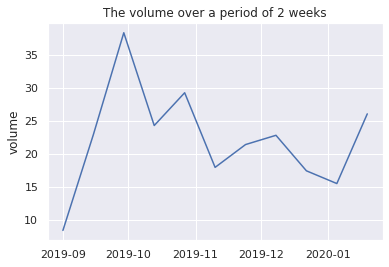

In [42]:
volume_by_period = df.volume.resample('2W').mean()
plt.plot(volume_by_period)
plt.title("The volume over a period of 2 weeks")
plt.ylabel("volume")
plt.savefig('volume_twoweeks.png')
plt.show()

##### Fig. 2 Interpretation:


This graph shows us how the volume of cryptocurrency have transited over five months. It consists of volume on the Y axis and a period of two week on the X axis. 

This graph was created to see whether  the hypothesis is comfirmed or not. Middle of each month represents two weeks from the beginning of a month. Except the beginning of September, mostly we can admit that the peak is coming either the beginning of a month or middle of each month. Increasing volume means that the market gets more active. Therefore, it can be concluded that the market gets more active in two-week period. This doesn't mean it's because people receive their salary, but we have a space to consider it as the reason. The limitation of this graph is a lack of data range. To verify this hypotheses in general, then the dataset has to contain complete more than one-year data.

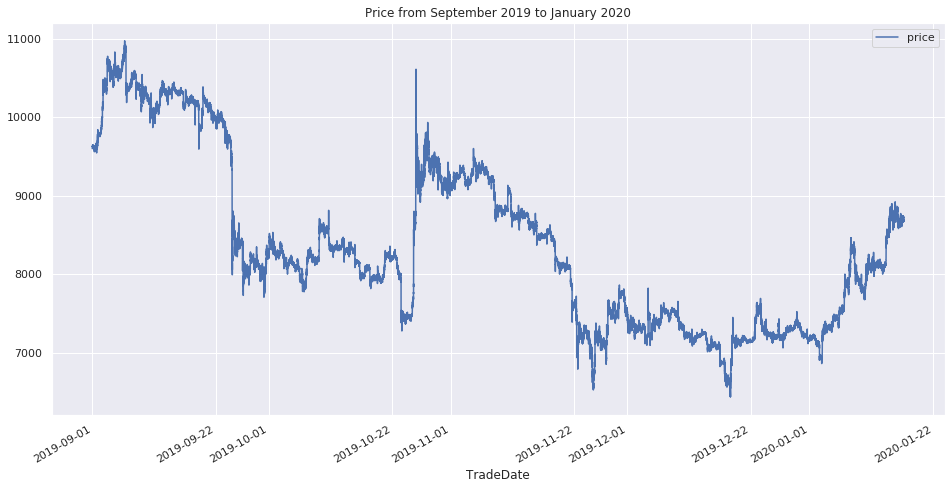

In [38]:
sell = df_market.loc[df_market["type"] == "sell"].amount
buy = df_market.loc[df_market["type"] == "buy"].amount
df_market.dropna(inplace=True)
df_market.reset_index(inplace=True)

df_market.plot(x = 'TradeDate', y = 'price',
               label = "price", figsize = (16,8), title = "Price from September 2019 to January 2020")

##### Fig. 3 Interpretation

This graph shows us price changes over five month. It consists of price on the Y axis and time on the X axis.

This graph shows that the price is dynamic, not static value. As shown in the price chart, the price never stays same as time goes by. 

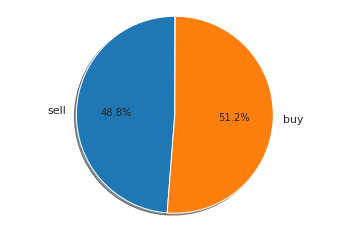

In [39]:
## proportion of buy and sell

sell = len(df_market.loc[df_market["type"] == "sell"]) / len(df_market)
buy = len(df_market.loc[df_market["type"] == "buy"]) / len(df_market)

labels = 'sell', 'buy'
sizes = [sell, buy]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['tab:blue','tab:orange'] )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### Fig. 4 Interpretation

This graph shows the ratio of buy and sell. The organge region represents buy while blue region is sell. As shown in this pie chart, both buy and sell are almost 50:50. This means that both seller and buyer are consistent, and the market maintains "healthy". If the ratio of buy is larger than 50%, everyone is selling their cryptocurrency, which will lead the reduction of the currency price. 

### 4.3. Model Construction
We’ll need a function that given a set of features, targets it will run different regression analysis models and compare them to each other.

#### Adjust for prediction

In [40]:
target = df["mean amount"]
features = df.drop('mean amount', axis=1)

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#### Preprocessing

In [ ]:
def preprocessor(train, test):
    
    '''
    function: preprocessor 
    param: train, test (Dataframe)
    return: X_train_scaled, X_test_scaled (numpy array)
    Does: preprocess the data between 0 and 1 by using MinMaxScaler 
    '''
    
    scaler = MinMaxScaler().fit(train)
    #scaler = StandardScaler().fit(train)
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)

    return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = preprocessor(X_train, X_test)

### feature selection - Univariate Selection

Univariate selection was chosen for feature selection because it considers each feature indipendently and selects features with the highest confidence. On the other hand, other features selections such as model-based features selection and iterative features selection were not suitable for this dataset. Model-based features selection will select the most important "one" feature. However, this project was aimed to see the relationship among features. Therefore, Model-based features selection is not suitable. Iterative features selection is not effective because this dataset has only five features. If it contains many features and is hard to determine the important ones, the it'd work effectively. But it's not. Thus, Univariate selection is the best choise for feature selection in this dataset. 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
select = SelectKBest(score_func=f_regression, k = 2)
select.fit(X_train_scaled, y_train)

X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

In [ ]:
X_train_selected

In [ ]:
features.columns

In [ ]:
select.get_support()

### 4.4. Model Evaluation
We shall use regression model evaluation techniques from class such as r2_score() and Mean Squared Error for predictive accuracy.

In [ ]:
model_original = LinearRegression().fit(X=X_train_scaled, y=y_train)

print("Original results:")
print("\tR-squared value for training set: ", r2_score(y_train, model_original.predict(X_train_scaled)))
print("\tR-squared value for testing set: ", r2_score(y_test, model_original.predict(X_test_scaled)))


model_selected = LinearRegression().fit(X=X_train_selected, y=y_train)

print("With selected features:")
print("\tR-squared value for training set: ", r2_score(y_train, model_selected.predict(X_train_selected)))
print("\tR-squared value for testing set: ", r2_score(y_test, model_selected.predict(X_test_selected)))

### 4.5. Model Testing
Test your tuned algorithms using your testing set

In [ ]:
predicted_original = model_original.predict(X_test_scaled)
predicted_selected = model_selected.predict(X_test_selected)

expected = y_test

In [ ]:
predicted_original[:5]

In [ ]:
predicted_selected[:5]

In [ ]:
expected[:5]

In [ ]:
results_df = pd.DataFrame(expected.values, columns=["expected"])
results_df["predicted_original"] = predicted_original
results_df["predicted_selected"] = predicted_selected
results_df.head()

### Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

print("Original results:")
print("\tmean squared error : ", mean_squared_error(expected, predicted_original))
print("Selected results:")
print("\tmean squared error: ", mean_squared_error(expected, predicted_selected))

### Obtain the equation of regression model

In [ ]:
select.get_support()

In [ ]:
features.columns

In [ ]:
model_selected.coef_

In [ ]:
model_selected.intercept_

\begin{equation}
Mean  Amount = 2.32 MaxBuy - 1.04 Spread + 0.09
\end{equation}
                                                                                            * period: 30 min

### Determine correlation

In [ ]:
from scipy import stats

In [ ]:
def get_correlation(df):
    column = list(df)
    for i in range(len(column)):
        if i < 2: 
            r, p = stats.pearsonr(df[column[i]], df[column[i+1]])
            print("correlation coefficient between",column[i], "and",column[i+1],": ", r, ", p-value:", p)

            r, p = stats.pearsonr(df[column[i]], df[column[i+2]])
            print("correlation coefficient between",column[i], "and",column[i+2],": ", r, ", p-value:", p)

            r, p = stats.pearsonr(df[column[i]], df[column[i+3]])
            print("correlation coefficient between",column[i], "and",column[i+3],": ", r, ", p-value:", p)

        elif i == 2:
            r, p = stats.pearsonr(df[column[i]], df[column[i+1]])
            print("correlation coefficient between",column[i], "and",column[i+1],": ", r, ", p-value:", p)

            r, p = stats.pearsonr(df[column[i]], df[column[i+2]])
            print("correlation coefficient between",column[i], "and",column[i+2],": ", r, ", p-value:", p)

        elif i == 3:
            r, p = stats.pearsonr(df[column[i]], df[column[i+1]])
            print("correlation coefficient between",column[i], "and",column[i+1],": ", r, ", p-value:", p)

In [ ]:
get_correlation(df)

**Based on characteristic of correlation coefficient,**
    - Correlation coefficient is close to 1: strong positive correlation
    - Correlation coefficient is close to 0: no correlation
    - Correlation coefficient is close to -1: negative positive correlation

Correlation between mean amount and max_buy is the most positive corelation. This result is intuitive in that the more people buy cryptocurrency, the more amount of transaction will be held. Notably, correlation between max_buy and spread will be disregarded because spread is affected a lot from max_buy when it's calculated. So, it is obvious that the coefficient value is close to 1. Then, Correlation between volume and min_sell was the most negative correlation in this dataset. Since the value -0.03 is very close to 0, it can be also said that there is slightly negative correlation between volume and min_sell, but they almost don't relate each other. 


**Hypothesis: Which features are most correlated with each other?**

Therefore, the answer for this hypothsis is "mean amount" and "max_buy". 

### Visualize the result of regression

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
#produce the scatter plot
graph = px.scatter(results_df, x="expected", y="predicted_selected", 
                   template="none", color="predicted_selected", opacity=.8, 
                   title="Expected vs. predicted with selected features")

#add the "perfect prediction" line; this is not the regression line
graph.update_layout(
    
    shapes=[    
        go.layout.Shape(
            type="line",
            x0=0, y0=0,
            x1=5, y1=5,
            line=dict(color="coral", width=2, dash="dash")
        )
    ]
)

#need to change axes limits; otherwise, plotly will auto-scale, leading to confusion
graph.update_layout(xaxis = dict(range = [0,0.5]))
graph.update_layout(yaxis = dict(range = [0,0.5]))

graph.show()

##### Interpretation

this graph is a scatter plot with regression line of expected and predicted values with selected features. X axis is expected value and Y axis is predicted value. As shown in this plot, the dots are scatterd, but stays between 0 and 1. This is because we used MinMaxScaler() to fit all values between 0 and 1. Also, the regression line is positive. While the dots are scattered, the line trends them. 

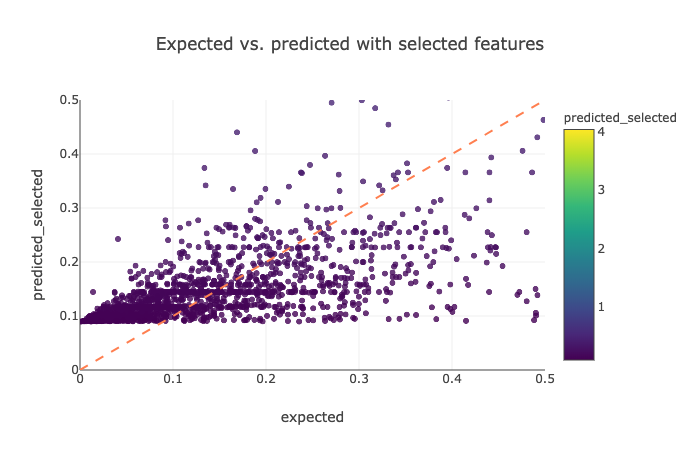

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
#### Classifiction Model:

- Summary of classification model

First, we get a dataset of trades and their information such as price, volume and type of each trade. We create some new features such as mid price, average price with different windows, difference of price and its derivatives. We apply One Hot Encoding on discrete variables. After we create some other features with use of unsupervised learning algorithms such as clustering. Then I check the correlation matrix of all features and drop all of them which have the absolute value of correlation more than 0.85. After we create a target variable which shows us the price movement in the next 4 hours - it is a discrete variable with two classes (either 0 if it is a negative difference or 1 otherwise). After we split data, taking 20% for testing. And finally we create a pipeline of 2 scaler models (MinMaxScaler and StandardScaler), 2 selector for feature selection (RFE and SelectKBest) and 4 classification models (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier and GradientBoostingClassifier). We didn’t use other classifiers since they do not give good predictive results on such chaotic data as financial. And we apply GridSearchCV on this pipeline with the data we have to test all possible variations of there 3 steps in the pipeline and simultaneously test many hyperparameters of these models. Then we simply check results and think about their meaning and importance.

- Interpretation

For model evaluation we used a balanced accuracy metric (basically ROC AUC score) which shows better understanding of our classification results, more precisely - binary classification. It differs from other metrics since it checks the weights of the correct and incorrect predictions for all classes we have in our target variable. For scaler purposes, we compared MinMaxScaler and StandardScaler. For feature selection purposes, we compared RFE and SelectKBest. For classification purposes, we compared RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier and GradientBoostingClassifier. We did not use other classifiers since they do not give good predictive results on such chaotic data as financial. The RandomForestClassifier proved to be the best predictive function with a max score of 57.25%


Our hypotheses was that our best classification model will be 60% accurate or more. Therefore, this hypothesis can be disprove. We can with some accuracy and a certain level of confidence. This sphere of life is too uncertain and unpredictable, but still we can find in it some patterns which can help in order to make something more complex. 


- Future Work

Almost everything in our world is about analysis and more certainly about behavior and relationships analysis. As I already mentioned we can use our insights and steps we do in many other fields such as physics and etc. This research shows us how unpredictable data in the finance field is and we can definitely use this experience and results in the future to set up any kind of trading bots on any crypto currency markets. Of  course we will need to do more backtesting before deploying the final version on the real market but this is the first step in the long journey of analyzing data. As a future work we can use bigger datasets to find more patterns. We can create more technical features based on our raw dataset. ANd finally maybe we will find the Holy Grail in this field)

##### Regression model:

- Summary of regression

In regression analysis, the mean amount of transaction was taken as target, and volume, min_sell, max_buy, and spread were used as features to predict the mean amount of transaction. These features were created from the original dataset. The variables were scaled by MinMaxScaler(), and two of the four features were selected by univariate feature selection. Then, LinearRegression() was used to make a model, and r2_score and mean squared error were computed. With the result, the graph of the regression model was created. 

- Interpretation of regression analysis

Throughout this regression analysis, some numerical results were presented. First of all, r2_score, which represents how straight the regression line is. The R2_score of the training set with selected features was 0.38 while the one of the testing set was 0.27. It is predictable that the r2_score on the testing set is lower than the one on the training set. Second, mean squared error was calculated as 0.02. Since a model is perfect if  the mean squared error is 0, the value of 0.02 is pretty much close to 0. Therefore, it can be concluded that the model is nearly perfect. Once all of linear regression algorithms were conducted, the equation with coefficients and intercept was obtained to predict the mean amount of transactions. 

In this regression segment, two questions were addressed. First question was, “Will the volume, which represents the total amount of transactions, increase every two weeks because people receive their salary?”. By plotting the graph of volume over each two week, the question was tried to answer. As a result, there are peaks at the beginning of each month and drop/raise in the middle of a month. However, it cannot be provided as a complete answer because we never know if salary directly affects cryptocurrency. Then, another question, “ Which features are most correlated with each other?”, was addressed by using pearsonr. As a result, the correlation between "mean amount" and "max_buy” was the most positive. The correlation coefficient was 0.6. This represents that the more people buy the currency, the more amount of transaction is. 

- Future work

The main part of this project was  a classification analysis with supervised learning and the optional part was regression analysis. Despite its optional segment, we could confirm two questions and provide a graph of the linear regression. To make this regression analysis more effectively, it would be better if we use time-based analysis. Next time, we would like to find a way to tackle financial data over time with regression. 



<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 5. Reference
1. CryptoDataDownload 
Retrieved from https://www.cryptodatadownload.com/data/gemini/

2. BitMart
Retrieved from https://bitmart.zendesk.com/hc/en-us/articles/360045109174-Understanding-the-Liquidity-from-your-Order-Book-Spread-Depth-and-Slippage

### CONTRIBUTIONS
David:
- Worked on the classification part
- Completed and revised all writing segments

Mark: 
- Wrote methodology 
- Worked on the entire classification part

Manami: 
- Wrote introduction
- Worked on the entire regression part